Zadanie 1

i=1 x=[1,1]
i=2 x=[2,0]

In [1]:
import numpy as np
A = np.array([[1,1],[1,1.0001]])
print("Współczynnik uwarunkowania macierzy A: ",np.linalg.cond(A,1))
print("Jest duży - macierz jest źle uwarunkowana, co oznacza, że mała zmiana wektora b skutkuje dużą zmianą wyniku")

Współczynnik uwarunkowania macierzy A:  40004.0001000044
Jest duży - macierz jest źle uwarunkowana, co oznacza, że mała zmiana wektora b skutkuje dużą zmianą wyniku


Zadanie 2

In [2]:
from scipy.linalg import hilbert
import math
import scipy
A=hilbert(8)
norma=np.linalg.norm(A,ord=1)#kolumnowa
normaodw=np.linalg.norm(np.linalg.inv(A),ord=1)
wsp=norma*normaodw
print("Dla normy kolumnowej",wsp)
norma=np.linalg.norm(A,ord=np.inf)#wierszowa
normaodw=np.linalg.norm(np.linalg.inv(A),ord=np.inf)
wsp=norma*normaodw
print("DLa normy wierszowej",wsp)
eigenvals = (np.linalg.eigvals(np.matmul(np.transpose(A),A)))
eigenvals1 = (np.linalg.eigvals(np.matmul(np.transpose(np.linalg.inv(A)),np.linalg.inv(A))))
norma  = math.sqrt(max(eigenvals))
normaodw  = math.sqrt(max(eigenvals1))
wsp=norma*normaodw
print("Dla normy spektralnej",wsp)

Dla normy kolumnowej 33872789110.107353
DLa normy wierszowej 33872789109.75766
Dla normy spektralnej 15257574847.190962


Na podstawie otrzymanych wysokich współczynników uwarunkowania można stwierdzić, że macierz Hilberta jest źle uwarunkowana.
Co oznacza, że błąd reprezentacji numerycznej danych wejściowych danego problemu znacznie wpływa na błąd wyniku.

Zadanie 3.

In [3]:
import time

n = 20
b=[]
t = np.linspace(0,1,n)
for i in range(0,n):
    b.append(math.cos(4*t[i]))
A = np.vander(t,increasing=True)
solvetimestart=time.time()
sol1=np.linalg.solve(A,b)
solvetimend=time.time()
solvetime=solvetimend-solvetimestart
print("czas Solve",solvetime)
norma1=b-np.matmul(A,sol1)
norma1=np.linalg.norm(norma1)
q,r = np.linalg.qr(A)
y = np.dot(q.T, b)
qrtimestart=time.time()
sol2 = scipy.linalg.solve_triangular(r,y)
qrtimend=time.time()
qrtime=qrtimend-qrtimestart
print("czas QR",qrtime)
norma2=b-np.matmul(A,sol2)
norma2=np.linalg.norm(norma2)
lstsqtimestart=time.time()
sol3=np.linalg.lstsq(A,b,rcond=None)[0]
lstsqtimend=time.time()
lstsqtime=lstsqtimend-lstsqtimestart
print("czas lstsq",lstsqtime)
norma3=b-np.matmul(A,sol3)
norma3=np.linalg.norm(norma3)
print("rozwiazania dla kolejnych metod(solve,QR,lstsq): ")
print(sol1)
print(sol2)
print(sol3)
print("normy residuum dla kolejnych metod: ")
print(norma1)
print(norma2)
print(norma3)


czas Solve 0.00015306472778320312
czas QR 0.008149862289428711
czas lstsq 0.0003337860107421875
rozwiazania dla kolejnych metod(solve,QR,lstsq): 
[ 1.00000000e+00  3.32764927e-11 -8.00000000e+00  6.35818437e-08
  1.06666656e+01  1.19699204e-05 -5.68898363e+00  5.53922234e-04
  1.62293934e+00  8.41840595e-03 -3.11464449e-01  4.71900888e-02
 -4.25883553e-02  9.95878711e-02 -1.01598838e-01  7.36115670e-02
 -3.99387587e-02  1.50687889e-02 -3.49070550e-03  3.73507626e-04]
[ 1.00000000e+00 -3.68180914e-11 -8.00000000e+00 -6.68040308e-08
  1.06666678e+01 -1.18047669e-05 -5.68879853e+00 -5.10732658e-04
  1.62758794e+00 -7.26294062e-03 -2.70154238e-01 -3.82348552e-02
  9.60780538e-02 -7.61559375e-02  7.02589345e-02 -5.34097741e-02
  2.86281041e-02 -1.04196293e-02  2.33851891e-03 -2.44422212e-04]
[ 1.00000000e+00  1.32997475e-11 -8.00000000e+00  2.27399505e-08
  1.06666663e+01  3.63061300e-06 -5.68891467e+00  1.32078403e-04
  1.62489928e+00  1.38430832e-03 -2.91765386e-01  3.94194537e-03
  3.181

Dla metody solve mamy najmniejszą normę oraz czas co oznacza, że jest najskuteczniejsza oraz najwydajniejsza

Zadanie 4

Współczynniki uwarunkowania:  [1.0598473617414927, 1.8059515241764281, 9.036893793254162, 681.288991576029, 540.097700030535, 819.6156179551776]
Metoda solve:  [6.9821714972185594e-15, 1.2489340658744188e-14, 1.6705672408913073e-14, 8.680290663730793e-13, 1.573707381956454e-12, 1.357095717907593e-12]
Metoda bicg:  [3.2499819730309085e-05, 2.3793051881645197e-05, 8.464587263254856e-05, 0.00010959843513568588, 6.849729337272237e-05, 7.553384721415931e-05]
Metoda gmres:  [3.249668546034907e-05, 2.3501985398665278e-05, 7.337809266299368e-05, 0.00044257100811839474, 0.0010350455274308727, 0.0016868909345741775]
Czasy
solve [0.001987457275390625, 0.0018239021301269531, 0.0016543865203857422, 0.0019626617431640625, 0.002187013626098633, 0.0016644001007080078] bicg [0.0006647109985351562, 0.0010712146759033203, 0.0018362998962402344, 0.06859397888183594, 0.07236218452453613, 0.07192540168762207] gmres [0.0006647109985351562, 0.0010712146759033203, 0.0018362998962402344, 0.06859397888183594, 0.

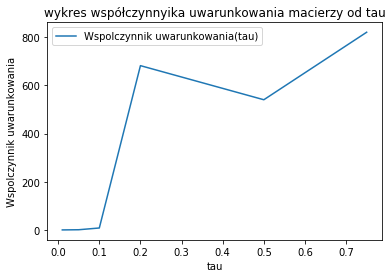

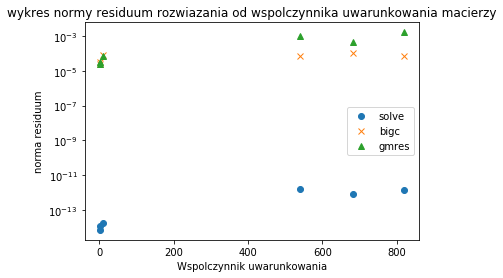

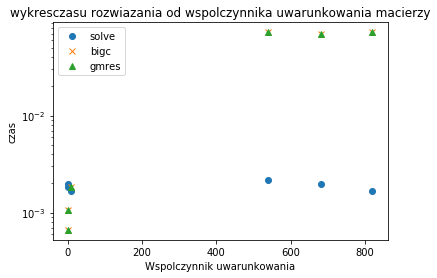

In [6]:
import scipy.sparse.linalg
import matplotlib.pyplot as plt
T= [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
n = 500
C = np.random.uniform(-1,1,n*n).reshape((n,n))
C = np.tril(C) + np.tril(C, -1).T
for i in range (0,n):
    C[i,i] = 1
b = np.random.uniform(-1,1,n)
wspUw=[]
solveresi=[]
bicgresi=[]
gmresresi=[]
solvetimeres=[]
bicgtimeres=[]
gmrestimeres=[]
for i in T:
    A=C.copy()
    for j in range(0,n):
        for k in range(0,j):
            if abs(A[j,k])>i:
                A[j,k] = 0
                A[k,j] = 0
    
    wspUw.append(np.linalg.cond(A))
    csrA=(scipy.sparse.csr_matrix(A)).toarray()
    startsolve = time.time()
    solveres = np.linalg.solve(A,b)
    stopsolve=time.time()
    solvetimeres.append(stopsolve-startsolve)
    startbicg=time.time()
    bicgres=scipy.sparse.linalg.bicg(csrA,b)[0]
    stopbicg=time.time()
    bicgtimeres.append(stopbicg-startbicg)
    startgmres=time.time()
    gmresres=scipy.sparse.linalg.gmres(csrA,b)[0]
    stopgmres=time.time()
    gmrestimeres.append(stopbicg-startbicg)
    solveresi.append(np.linalg.norm(b-np.matmul(A,solveres)))
    bicgresi.append(np.linalg.norm(b-np.matmul(csrA,bicgres)))
    gmresresi.append(np.linalg.norm(b-np.matmul(csrA,gmresres)))
    
print("Współczynniki uwarunkowania: ",wspUw)
print("Metoda solve: ",solveresi)
print("Metoda bicg: ",bicgresi)
print("Metoda gmres: ",gmresresi)
print("Czasy")
print("solve",solvetimeres,"bicg",bicgtimeres,"gmres",gmrestimeres)

plt.figure()
plt.plot(T,wspUw,label='Wspolczynnik uwarunkowania(tau)')
plt.title('wykres współczynnyika uwarunkowania macierzy od tau')
plt.xlabel('tau')
plt.ylabel('Wspolczynnik uwarunkowania')
plt.legend()
plt.show()

plt.figure()
plt.semilogy(wspUw,solveresi,"o",label='solve')
plt.semilogy(wspUw,bicgresi,"x",label='bigc')
plt.semilogy(wspUw,gmresresi,"^",label='gmres')
plt.title('wykres normy residuum rozwiazania od wspolczynnika uwarunkowania macierzy')
plt.xlabel('Wspolczynnik uwarunkowania')
plt.ylabel('norma residuum')
plt.legend()
plt.show()

plt.figure()
plt.semilogy(wspUw,solvetimeres,"o",label='solve')
plt.semilogy(wspUw,bicgtimeres,"x",label='bigc')
plt.semilogy(wspUw,gmrestimeres,"^",label='gmres')
plt.title('wykresczasu rozwiazania od wspolczynnika uwarunkowania macierzy')
plt.xlabel('Wspolczynnik uwarunkowania')
plt.ylabel('czas')
plt.legend()
plt.show()

Ponownie dla metody solve mamy najmniejszą normę oraz czas co oznacza, że jest najskuteczniejsza oraz najwydajniejsza
Dla wzrostu tau wzrasta współczynnik uwarunkowania macierzy A
im większy współczynnik uwarunkowania macierzy A tym czas wykonywania jest wyższy ,tylko metoda solve zachowuje podobny czas.

Zadanie 5

In [5]:
def GaussSeidl(A,b,n,epsilon):
    L = np.tril(A)
    U = A - L
    MGS=-scipy.linalg.inv(L)*U
    D=np.diagonal(MGS)
    maxdiag=abs(D[0])
    for i in range(0,len(D)):
        if(abs(D[i])>maxdiag):
            maxdiag=abs(D[i])
    if(maxdiag<1):
        xk = np.ones(len(b)) - np.ones(len(b))
        k=0
        while(k<n):
            k+=1
            xk1 = np.dot(np.linalg.inv(L), b - np.dot(U, xk)) 
            norma = abs(np.linalg.norm(b-np.matmul(A,xk1))-np.linalg.norm(b-np.matmul(A,xk)))
            xk=xk1
            if(epsilon>norma ):
                break
    else:
        print("złe dane")
    return xk1
A = np.array([[1,2,3],[2,1,3],[3,2,1]])
b = np.array([1,2,0])
x_k1 = GaussSeidl(A,b,100,math.pow(10,-10))
xd=np.linalg.solve(A,b)
print("Rozwiązanie metodą Gaussa-Seidela: ",x_k1)
print("Rozwiązanie metodą solve: ",xd)
print("Dla tego układu metoda nie działa ponieważ macierz A nie spełnia kryteriów silnej ani słabej dominacji")
A2=np.array([[12,3,-5],[1,5,3],[3,7,13]])
x2k1 = GaussSeidl(A2,b,100,math.pow(10,-10))
xd2=np.linalg.solve(A2,b)
print("metoda dziala np dla A=[[12,3,-5],[1,5,3],[3,7,13]]")
print("Rozwiązanie metodą Gaussa-Seidela: ",x2k1)
print("Rozwiązanie metodą solve: ",xd2)

Rozwiązanie metodą Gaussa-Seidela:  [-9.71400324e+60 -2.37837221e+62  5.04816453e+62]
Rozwiązanie metodą solve:  [ 0.25 -0.75  0.75]
Dla tego układu metoda nie działa ponieważ macierz A nie spełnia kryteriów silnej ani słabej dominacji
metoda dziala np dla A=[[12,3,-5],[1,5,3],[3,7,13]]
Rozwiązanie metodą Gaussa-Seidela:  [-0.18705036  0.60791367 -0.28417266]
Rozwiązanie metodą solve:  [-0.18705036  0.60791367 -0.28417266]
